
 IRIS DATA : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

array([[50,  0,  0],
       [ 0,  5, 45],
       [ 0, 50,  0]])

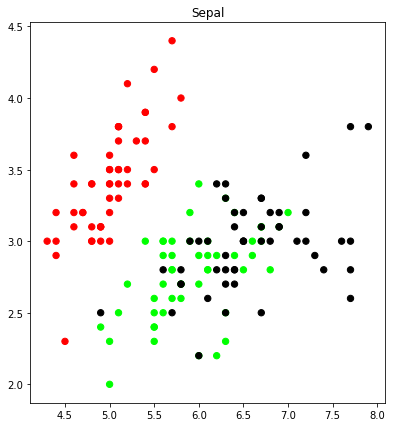

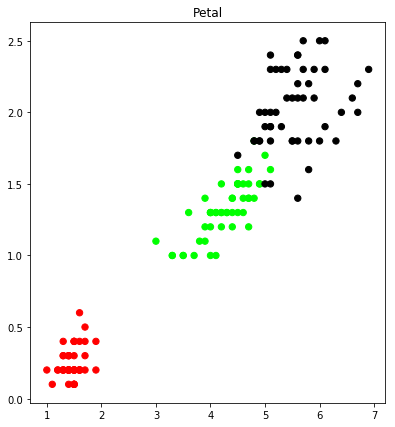

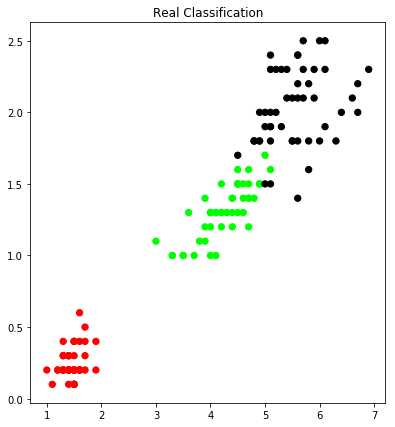

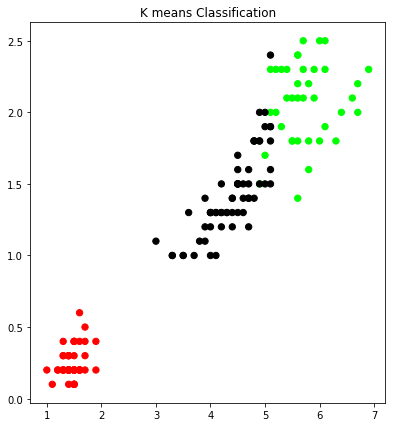

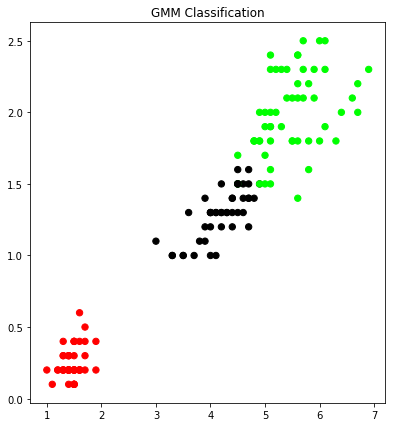

In [58]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
iris = datasets.load_iris()
print("\n IRIS DATA :",iris.data);
print("\n IRIS FEATURES :\n",iris.feature_names)
print("\n IRIS TARGET :\n",iris.target)
print("\n IRIS TARGET NAMES:\n",iris.target_names)
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
def plot_graph(rows, cols, index, scatter, target, title):
    plt.figure(figsize=(14,7))
    colormap = np.array(['red', 'lime', 'black'])
    plt.subplot(rows, cols, index)
    plt.scatter(scatter[0], scatter[1], c=colormap[target], s=40)
    plt.title(title)
scatter = [X.Sepal_Length, X.Sepal_Width]
plot_graph(1, 2, 1, scatter, y.Targets, 'Sepal')
scatter = [X.Petal_Length, X.Petal_Width]
plot_graph(1, 2, 2, scatter, y.Targets, 'Petal')
model = KMeans(n_clusters=3)
model.fit(X)
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64) #change 0s to 1s in model labels to retain same color
print("Model labels\n", predY)
scatter = [X.Petal_Length, X.Petal_Width]
plot_graph(1, 2, 1, scatter, y.Targets, 'Real Classification')
scatter = [X.Petal_Length, X.Petal_Width]
plot_graph(1, 2, 2, scatter, predY, 'K means Classification')
sm.accuracy_score(y, predY)
sm.confusion_matrix(y, predY)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.sample(5)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)
y_cluster_gmm
scatter = [X.Petal_Length, X.Petal_Width]
plot_graph(1, 2, 1, scatter, y_cluster_gmm, 'GMM Classification')
sm.accuracy_score(y, y_cluster_gmm)
sm.confusion_matrix(y, y_cluster_gmm)